In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
print('starting')

with open('data/NHPC_Profiles-20181012000000-28192') as fi:
    hli = 0    # header line index
    rep = []
    loc_name = ''
    loc_id = ''
    date = ''
    time = ''
    
    for line in fi:
        if hli == 0:
            [loc_name, loc_id, date, time] = line.split()
            loc_id = loc_id[1:-2]
            hli = 1
            continue
            
        elif hli < 4:
            hli += 1
            continue
        
        elif line == '===\n':
            ofn = 'data/processed/' + loc_id + '_' + date + '_' + time + '.csv'
            if len(rep) > 0 and rep[0] != '\n':
                with open(ofn, 'w') as fo:
                    fo.write('Height,Frequency,Density\n')
                    for ol in rep:
                        op = ''
                        for os in ol.split():
                            op += os + ','
                        fo.write(op[0:-1] + '\n')
            hli = 0
            rep.clear()
        else:
            rep.append(line)
            
print('end')

starting
end


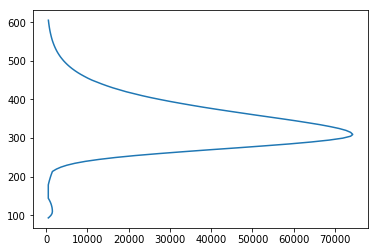

In [3]:
df = pd.read_csv('data/processed/mo155_2018-10-12_00:01:00.csv')

plt.plot(df['Density'], df['Height'])

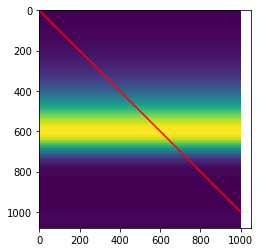

In [32]:
world = np.flip(np.tile(np.repeat(df['Density'], 10), (1000,1)).T, 0)

# plt.imshow(world, interpolation='nearest', cmap=cm.winter)
plt.imshow(world, interpolation='nearest')
plt.plot(np.linspace(0, 1000, 1000),np.linspace(0, 1000, 1000), 'r')

pos = np.array([400, 0])
vel = np.array([10, 10])

path = []

while True:
    rho = world[pos[0]][pos[1]]
    theta = np.acos(np.sqrt((rho + 10) / rho)
    pos_new = pos + vel
    

plt.show()

In [21]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of programmatic
    plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : bool, optional, *deprecated*, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            *x* is detrended by the *detrend* callable. Default is no
            normalization.
        
        normed : bool, op